In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

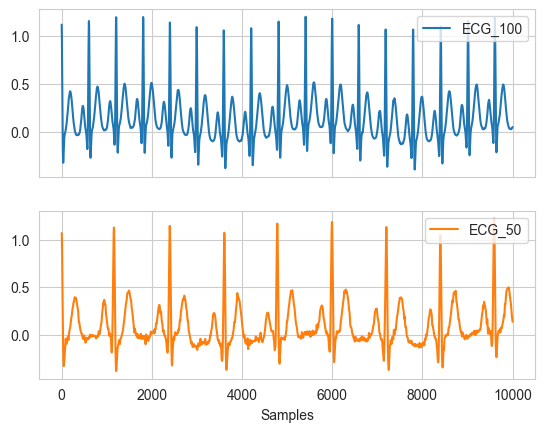

In [2]:
# Alternate heart rate and noise levels
ecg50 = nk.ecg_simulate(duration=10, noise=0.05, heart_rate=50)
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

# Visualize
ecg_df = pd.DataFrame({"ECG_100": ecg100,
                       "ECG_50": ecg50})

nk.signal_plot(ecg_df, subplots=True)

In [3]:
print(ecg_df)

       ECG_100    ECG_50
0     1.119205  1.068420
1     1.113508  1.065931
2     1.099699  1.061158
3     1.077801  1.053695
4     1.048300  1.042907
...        ...       ...
9995  0.042877  0.150142
9996  0.044199  0.146111
9997  0.045641  0.142147
9998  0.047197  0.138265
9999  0.048861  0.134478

[10000 rows x 2 columns]


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

In [5]:
ecg_100_data = ecg_df['ECG_100'].values
ecg_50_data = ecg_df['ECG_50'].values

In [6]:
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(1, activation='linear')(encoded)

In [7]:
autoencoder = Model(input_layer, decoded)

In [8]:
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
history = autoencoder.fit(ecg_100_data, ecg_50_data, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0489 - val_loss: 0.0589
Epoch 2/100
110/110 [==============================] - 0s 540us/step - loss: 0.0474 - val_loss: 0.0585
Epoch 3/100
110/110 [==============================] - 0s 536us/step - loss: 0.0471 - val_loss: 0.0570
Epoch 4/100
110/110 [==============================] - 0s 566us/step - loss: 0.0470 - val_loss: 0.0567
Epoch 5/100
110/110 [==============================] - 0s 511us/step - loss: 0.0468 - val_loss: 0.0561
Epoch 6/100
110/110 [==============================] - 0s 526us/step - loss: 0.0465 - val_loss: 0.0573
Epoch 7/100
110/110 [==============================] - 0s 527us/step - loss: 0.0465 - val_loss: 0.0565
Epoch 8/100
110/110 [==============================] - 0s 518us/step - loss: 0.0464 - val_loss: 0.0559
Epoch 9/100
110/110 [==============================] - 0s 507us/step - loss: 0.0467 - val_loss: 0.0567
Epoch 10/100
110/110 [==============================] - 0s 514us/step - los

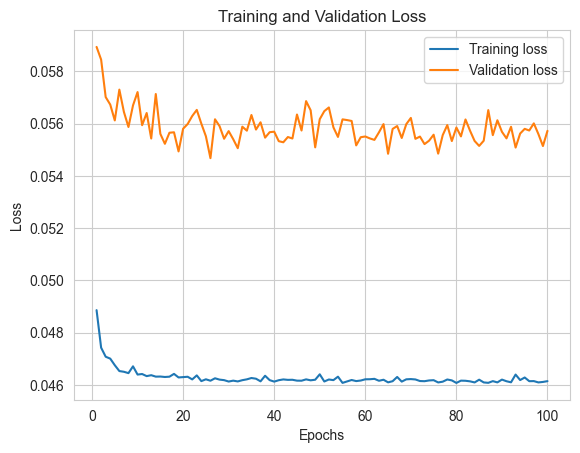

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotando as curvas de perda
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_ecg_100 = encoder.predict(ecg_100_data)

313/313 [==============================] - 0s 279us/step


In [12]:
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=decoder_input, outputs=decoder_layer(decoder_input))
decoded_ecg_50 = decoder.predict(encoded_ecg_100)

313/313 [==============================] - 0s 261us/step


In [13]:
decoded_ecg_50

array([[0.28780395],
       [0.2860187 ],
       [0.28169152],
       ...,
       [0.12426232],
       [0.1221685 ],
       [0.11992878]], dtype=float32)

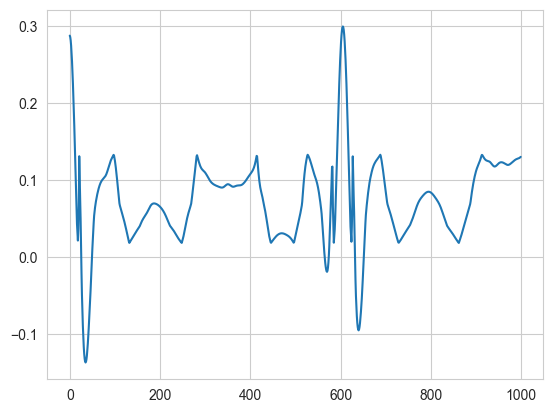

In [14]:
plt.plot(decoded_ecg_50[0:1000])